In [1]:
import pandas as pd 

In [2]:
BHNames= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black',
         'lstat','medv'] 

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

print(dataset.info()) 

In [4]:
dataset = pd.read_csv(url,delim_whitespace=True,names=BHNames) 

In [5]:
dataset.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### To Scale data from 0 to 1 apply Preprocesing Mms

In [6]:
from sklearn.preprocessing import MinMaxScaler 

In [7]:
scaler = MinMaxScaler() 
3#print(scaler.fit(dataset))
#print(dataset.head()) 
DataScaled = scaler.fit_transform(dataset) 
print(DataScaled) 
DataScaled = pd.DataFrame(DataScaled,columns=BHNames) 

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


#### Split the dataset into dependent and independent variable

In [8]:
x = DataScaled.drop(labels=['medv'],axis=1) 

print('X Shape = {}'.format(x.shape)) 

X Shape = (506, 13)


In [9]:
y = DataScaled['medv']

print('Y shape={}'.format(y.shape)) 

Y shape=(506,)


#### Split the dataset into traning and testing dataset

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5) 

In [12]:
print('x_train shape = {}'.format(x_train.shape))
print('\n')
print('x_test shape = {}'.format(x_test.shape)) 
print('\n') 
print('y_shape = {}'.format(y_train.shape))
print('\n') 
print('y_test shape = {}'.format(y_test.shape)) 

x_train shape = (354, 13)


x_test shape = (152, 13)


y_shape = (354,)


y_test shape = (152,)


#### Implementing ANN Using Keras

In [13]:
import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras import metrics 

Using TensorFlow backend.


In [14]:
model = Sequential() 

First input and Hidden layer

In [15]:
# Dence(Output_unit,Input_Unit,Activation Function)
model.add(Dense(20,input_dim=13,activation='relu')) 

Second Hidden Layer

In [16]:
model.add(Dense(10,activation='relu')) 

Output Layer

In [17]:
model.add(Dense(1,activation='linear')) 

#### Compile the Model 

In [18]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy']) 

#### Fit and Display the Summary based on traning and testing data

In [19]:
model.fit(x_train,y_train,epochs=1000,verbose=1)   

Epoch 1/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.0056
Epoch 2/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0984 - accuracy: 0.0056
Epoch 3/1000
354/354 [==============================] - 0s 71us/step - loss: 0.0740 - accuracy: 0.0056
Epoch 4/1000
354/354 [==============================] - 0s 71us/step - loss: 0.0601 - accuracy: 0.0056
Epoch 5/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0484 - accuracy: 0.0056
Epoch 6/1000
354/354 [==============================] - 0s 71us/step - loss: 0.0425 - accuracy: 0.0085
Epoch 7/1000
354/354 [==============================] - 0s 76us/step - loss: 0.0386 - accuracy: 0.0085
Epoch 8/1000
354/354 [==============================] - 0s 88us/step - loss: 0.0356 - accuracy: 0.0085
Epoch 9/1000
354/354 [==============================] - 0s 85us/step - loss: 0.0327 - accuracy: 0.0085
Epoch 10/1000
354/354 [==============================] - 0s 90us/step - lo

354/354 [==============================] - 0s 93us/step - loss: 0.0052 - accuracy: 0.0254
Epoch 157/1000
354/354 [==============================] - 0s 82us/step - loss: 0.0055 - accuracy: 0.0254
Epoch 158/1000
354/354 [==============================] - 0s 99us/step - loss: 0.0054 - accuracy: 0.0254
Epoch 159/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0052 - accuracy: 0.0254
Epoch 160/1000
354/354 [==============================] - 0s 73us/step - loss: 0.0056 - accuracy: 0.0254
Epoch 161/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0052 - accuracy: 0.0254
Epoch 162/1000
354/354 [==============================] - 0s 73us/step - loss: 0.0051 - accuracy: 0.0254
Epoch 163/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0053 - accuracy: 0.0254
Epoch 164/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0053 - accuracy: 0.0254
Epoch 165/1000
354/354 [==============================] - 0s 73us/step

354/354 [==============================] - 0s 71us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 235/1000
354/354 [==============================] - 0s 85us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 236/1000
354/354 [==============================] - 0s 82us/step - loss: 0.0047 - accuracy: 0.0254
Epoch 237/1000
354/354 [==============================] - 0s 73us/step - loss: 0.0047 - accuracy: 0.0254
Epoch 238/1000
354/354 [==============================] - 0s 76us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 239/1000
354/354 [==============================] - 0s 82us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 240/1000
354/354 [==============================] - 0s 82us/step - loss: 0.0045 - accuracy: 0.0254
Epoch 241/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0049 - accuracy: 0.0254
Epoch 242/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 243/1000
354/354 [==============================] - 0s 73us/step

354/354 [==============================] - 0s 71us/step - loss: 0.0040 - accuracy: 0.0254
Epoch 390/1000
354/354 [==============================] - 0s 71us/step - loss: 0.0040 - accuracy: 0.0254
Epoch 391/1000
354/354 [==============================] - 0s 76us/step - loss: 0.0040 - accuracy: 0.0254
Epoch 392/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0045 - accuracy: 0.0254
Epoch 393/1000
354/354 [==============================] - 0s 65us/step - loss: 0.0044 - accuracy: 0.0254
Epoch 394/1000
354/354 [==============================] - 0s 71us/step - loss: 0.0040 - accuracy: 0.0254
Epoch 395/1000
354/354 [==============================] - 0s 73us/step - loss: 0.0045 - accuracy: 0.0254
Epoch 396/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0041 - accuracy: 0.0254
Epoch 397/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0039 - accuracy: 0.0254
Epoch 398/1000
354/354 [==============================] - 0s 82us/step

354/354 [==============================] - 0s 88us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 545/1000
354/354 [==============================] - 0s 88us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 546/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0036 - accuracy: 0.0282
Epoch 547/1000
354/354 [==============================] - 0s 110us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 548/1000
354/354 [==============================] - 0s 102us/step - loss: 0.0038 - accuracy: 0.0282
Epoch 549/1000
354/354 [==============================] - 0s 96us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 550/1000
354/354 [==============================] - 0s 76us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 551/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0038 - accuracy: 0.0282
Epoch 552/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 553/1000
354/354 [==============================] - 0s 71us/st

354/354 [==============================] - 0s 96us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 701/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 702/1000
354/354 [==============================] - 0s 88us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 703/1000
354/354 [==============================] - 0s 85us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 704/1000
354/354 [==============================] - 0s 88us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 705/1000
354/354 [==============================] - 0s 107us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 706/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0042 - accuracy: 0.0282
Epoch 707/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 708/1000
354/354 [==============================] - 0s 59us/step - loss: 0.0036 - accuracy: 0.0282
Epoch 709/1000
354/354 [==============================] - 0s 68us/ste

354/354 [==============================] - 0s 93us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 856/1000
354/354 [==============================] - 0s 93us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 857/1000
354/354 [==============================] - 0s 96us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 858/1000
354/354 [==============================] - 0s 88us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 859/1000
354/354 [==============================] - 0s 76us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 860/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 861/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 862/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 863/1000
354/354 [==============================] - 0s 85us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 864/1000
354/354 [==============================] - 0s 96us/step

In [20]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


#### Testing the test dataset

In [22]:
y_pred = model.predict(x_test) 

score = model.evaluate(x_test,y_test,verbose=0)

print(score[0]) 

0.008572326826029703


#### Visualize traning and testing dataset

Text(0.5, 1.0, 'Keras Neural Network Model')

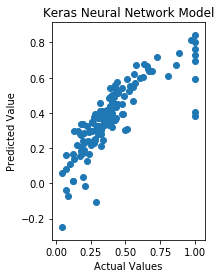

In [34]:
# Multiple Linear Regression 

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

LModel = LinearRegression() 
LModel.fit(x_train,y_train) 

y_pred = LModel.predict(x_test) 
plt.figure(1)
plt.subplot(121)
plt.scatter(y_test,y_pred) 
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Value') 
#plt.ylable('Predicted values')
plt.title('Keras Neural Network Model') 

print("\n")
plt.subplot(122)
plt.scatter(y_test,y_pred)